## Handwritten Digit Recognition using MNIST Dataset using SVM Classifier

In [15]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Handwritten Digit Recognition

Use the sklearn.dataset load_digits() method. It loads the handwritten digits dataset.
The returned data is in the form of a Dictionary. 
The 'data' attribute contains a flattenned array of 64 (each digit image is of 8*8 pixels) elements representing the digits. 

The 'target' attribute is the 'class' of Digit (0-9)
Each individual digit is represented through a flattendded 64 digit array numbers of Greyscale values.
There are 1797 samples in total and each class or digit has roughly 180 samples.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [16]:
digits['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits['images'][1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [7]:
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
digits['target'][0]

0

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

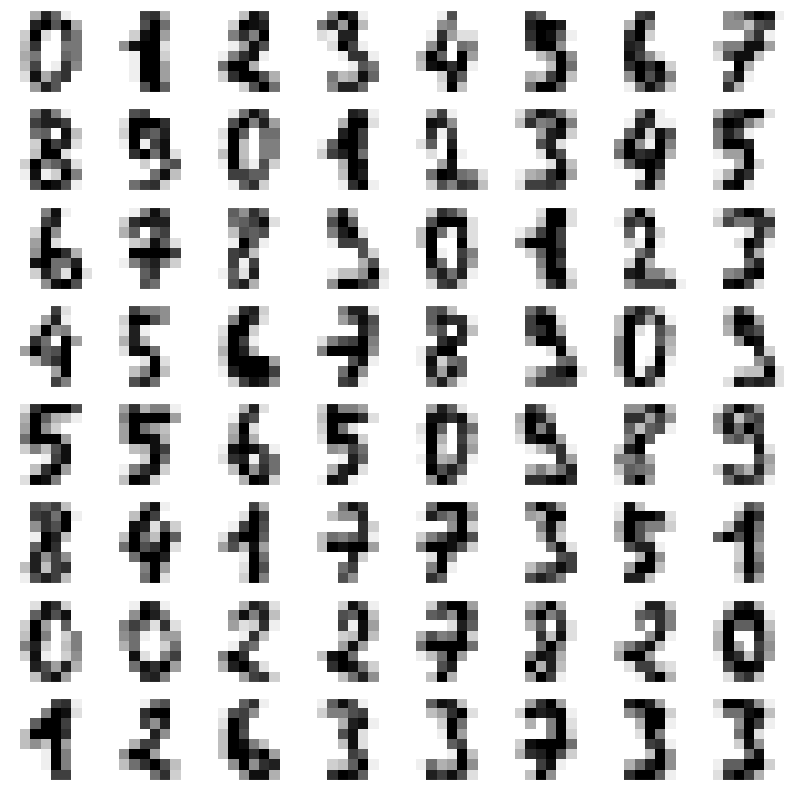

In [10]:
# Each Digit is represented in digits.images as a matrix of 8x8 = 64 pixels. Each of the 64 values represent
# a greyscale. The Greyscale are then plotted in the right scale by the imshow method. 

fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

D:\ide\python\python3.11\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
D:\ide\python\python3.11\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


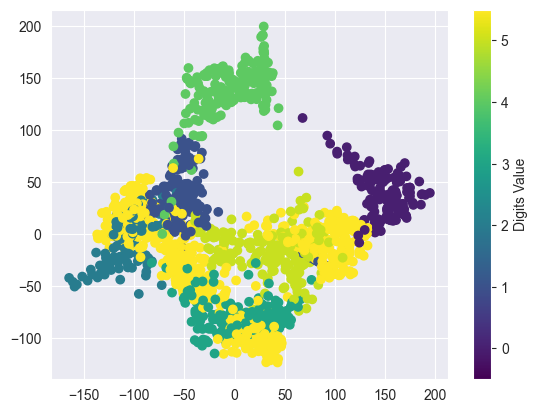

In [17]:
# Plotting - Clustering the data points after using Manifold Learning   

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)

projection = iso.fit_transform(digits.data)     # digits.data - 64 dimensions to 2 dimensions

plt.scatter(projection[:, 0], projection[:, 1], c=digits.target, cmap="viridis")

plt.colorbar(ticks=range(10), label='Digits Value')
plt.clim(-0.5, 5.5)

In [18]:
print(projection[:, 0][70], projection[:, 1][70])

-56.8777495163017 62.08657097686817


In [19]:
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()

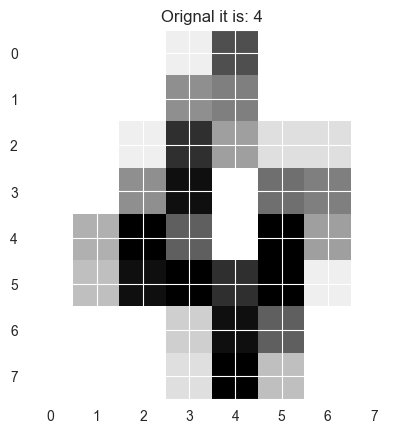

In [20]:
view_digit(4)

### Use the Support Vector Machine Classifier to train the Data
Use part of the data for train and part of the data for test (predicion)

In [22]:
main_data = digits['data']
targets = digits['target']

In [23]:
from sklearn import svm

svc = svm.SVC(gamma=0.001 , C = 100)    

# GAMMA is a parameter for non linear hyperplanes. 
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term. 
# It controls the trade off between smooth decision boundary and classifying the training points correctly.

svc.fit(main_data[:1500] , targets[:1500])   

predictions = svc.predict(main_data[1501:])  

list(zip(predictions , targets[1501:]))

[(7, 7),
 (4, 4),
 (6, 6),
 (3, 3),
 (1, 1),
 (3, 3),
 (9, 9),
 (1, 1),
 (7, 7),
 (6, 6),
 (8, 8),
 (4, 4),
 (3, 3),
 (1, 1),
 (4, 4),
 (0, 0),
 (5, 5),
 (3, 3),
 (6, 6),
 (9, 9),
 (6, 6),
 (1, 1),
 (7, 7),
 (5, 5),
 (4, 4),
 (4, 4),
 (7, 7),
 (2, 2),
 (8, 8),
 (2, 2),
 (2, 2),
 (5, 5),
 (7, 7),
 (9, 9),
 (5, 5),
 (4, 4),
 (8, 8),
 (8, 8),
 (4, 4),
 (9, 9),
 (0, 0),
 (8, 8),
 (9, 9),
 (8, 8),
 (0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (1, 8),
 (9, 9),
 (0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (9, 9),
 (0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (1, 8),
 (9, 9),
 (4, 0),
 (9, 9),
 (5, 5),
 (5, 5),
 (6, 6),
 (5, 5),
 (0, 0),
 (9, 9),
 (8, 8),
 (9, 9),
 (8, 8),
 (4, 4),
 (1, 1),
 (7, 7),
 (7, 7),
 (3, 3),
 (5, 5),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (7, 7),
 (8, 8),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (6, 6),
 (8, 3),
 (3, 3),
 (7, 7),
 (3, 3),
 (3, 3),
 (4, 4),
 (6, 6),
 (6, 6),
 (6, 6),
 (9, 4),
 

### Create the Confusion Matric for Performance Evaluation

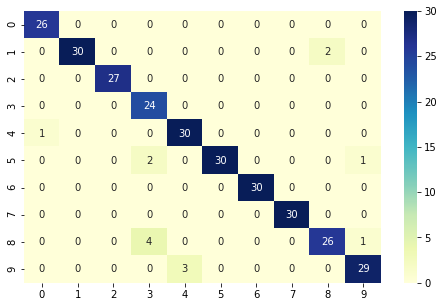

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predictions, targets[1501:])

conf_matrix = pd.DataFrame(data = cm)

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [22]:
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 30,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0, 26,  1],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0, 29]])

### Print the Classification Report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296
